<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Espín - Boson</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

## Hamiltoniano

$$H=\frac{\Delta}{2}\sigma_{z}+\hbar\omega_{0}\left(a^{\dagger}a+\frac{1}{2}\right)+g(\sigma_{+}a+\sigma_{-}a^{\dagger})+g(\sigma_{+}a^{\dagger}+\sigma_{-}a)$$

$$H=\frac{\Delta}{2}\sigma_{z}\otimes\mathbf{I}_{N}+\mathbf{I}_{2}\otimes\hbar\omega_{0}\left(a^{\dagger}a+\frac{1}{2}\mathbf{I}_{N}\right)+g(\sigma_{+}\otimes a+\sigma_{-}\otimes a^{\dagger})+g(\sigma_{+}\otimes a^{\dagger}+\sigma_{-}\otimes a)$$

In [63]:
Paulix = [0.0 1.0;1 0]
Pauliy = [0.0 -im;im 0]
Pauliz = [1.0 0;0 -1]
Paulip = [0.0 2;0 0]
Paulim = [0.0 0;2 0]
hbar = 1#.05457162853e-34

1

In [8]:
function creation(n)
    a = zeros(n-1)
    for i in 1:n-1
        a[i] = sqrt(i)
    end
    return diagm(a,-1)
end;

Tenemos que $aa^{\dagger}=a^{\dagger}a+\mathbf{I}_{N}$

In [9]:
function ket(n,m)    
    k = zeros(n)
    k[m+1] = 1
    return k
end;

In [64]:
function Hh(n,w0)
    a = creation(n)'
    hh = kron(eye(2),hbar*w0*(a'*a+0.5*eye(n)))
    return hh
end;

function Hr(n,w0)
    a = creation(n)'
    hr = kron(Paulip,a)+kron(Paulim,a')
    return hr
end;

function Ha(n,w0)
    a = creation(n)'
    ha = kron(Paulip,a')+kron(Paulim,a)
    return ha
end;

function H(n,delta,w0,g)
    h = (delta/2)*kron(Pauliz,eye(n))+Hh(n,w0)+g*Hr(n,w0)+g*Ha(n,w0)
    return h
end;

In [66]:
Htot = H(100,2,2,2)

200×200 Array{Float64,2}:
 2.0  0.0  0.0  0.0   0.0   0.0   0.0  …    0.0    0.0    0.0    0.0    0.0
 0.0  4.0  0.0  0.0   0.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  6.0  0.0   0.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  8.0   0.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0  10.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0  12.0   0.0  …    0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0   0.0  14.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0   0.0   0.0  …    0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0   0.0   0.0       0.0    0.0    0.0    0.0    0.0
 0.0  0.0  0.0  0.0   0.0   0.0   0.0       0.0    0.0    0.0 

Para tener los estados coherentes $\left|\alpha\rangle\right.$ se utiliza la ecuación

$$\left|\alpha\rangle\right.=e^{-\left|\alpha\right|^2/2}\sum_{n=0}^{\infty}\frac{\alpha^{n}}{\sqrt{n!}}\left|n\rangle\right.$$

In [70]:
function coherent(n,alpha)
    s = 0
    for i in 0:n-1
        s += alpha^i*ket(n,i)/sqrt(factorial(float(i)))
    end
    s *= exp(-abs(alpha)^2*0.5)
    return s
end;

In [82]:
alpha = coherent(100,pi);

Para construir el estado inicial total tenemos que el espacio de espín es $\mathcal{H}_{s}=\mathrm{gen}\{\left|\uparrow\rangle\right.,\left|\downarrow\rangle\right.\}$, por lo que si se tiene un estado coherente $\left|\alpha\rangle\right.$, el estado inicial será

$$\left|\psi_{0}\rangle\right.=\left|\uparrow\rangle\right.\otimes\left|\alpha\rangle\right.$$

In [83]:
psi0 = kron([1;0],alpha);

Entonces, para conocer el estado al tiempo $t$ se utiliza el propagador

$$\left|\psi(t)\rangle\right.=U(t)\left|\psi_{0}\rangle\right.=e^{-iHt}\left|\psi_{0}\rangle\right.$$

In [84]:
psi(t) = expm(-im*t*Htot)*psi0;

Encontrar el estado del espin al tiempo $t$, $\rho_{s}$, el cual es

$$\rho_{s}=\mathrm{tr}_{B}\bigl(\left|\psi(t)\rangle\right.\left.\langle\psi(t)\right|\bigr)$$

con $\rho_{tot}=\left|\psi(t)\rangle\right.\left.\langle\psi(t)\right|$ es la matriz de densidad de estados puros.

In [85]:
psit(t)=conj(reshape(psi(t),(100,2))')

psit (generic function with 1 method)

In [86]:
rhos(t)=psit(t)*psit(t)'

rhos (generic function with 1 method)

In [116]:
purity(t)=real(trace(rhos(t)^2))

purity (generic function with 1 method)

In [89]:
using PyPlot

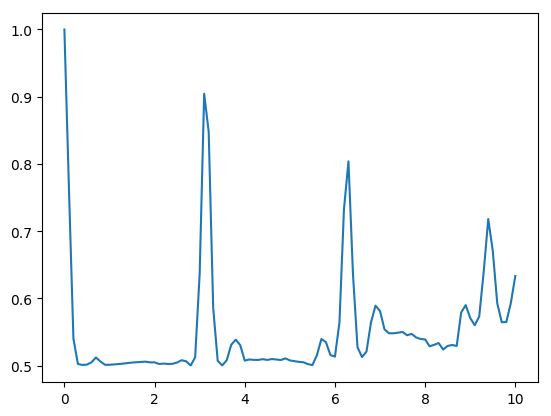

In [118]:
listt = 0:0.1:10
plot(listt,purity.(listt));

In [206]:
fstate(t)=rhos(t)[1]

fstate (generic function with 1 method)

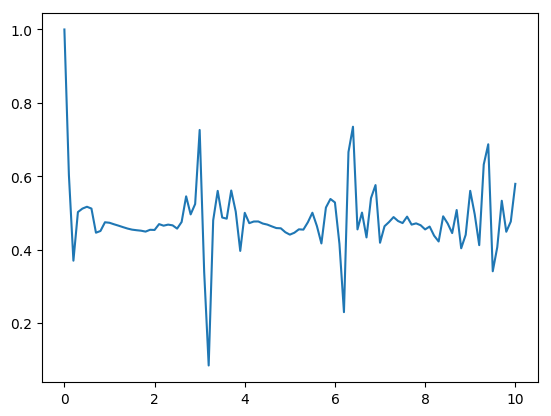

In [210]:
plot(listt,fstate.(listt));

Pureza, probabilidad del estado exitado, iniciando con estados coherentes.